<a id='2'></a>
# <span id = 'Table of content'>Table of Content</span>

<a id="toc"></a>
- [1. Introduction](#1)
- [2. Table of Content](#2)
- [3. Imports](#3)
- [4. Importing and Creation of dataset](#4)


<a id="3"></a>
# <span><center style="background-color: #922b21; color:white;"><strong>Libraries 📚</strong></center></span>

In [84]:
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff


from plotly.subplots import make_subplots
from pandas_profiling import ProfileReport
from yahoofinancials import YahooFinancials


plt.rcParams['figure.figsize']=(15,8)
%matplotlib inline


In [ ]:
red_palette = ['#470202','#5e0202','#750202','#8b0202',
'#9d0101','#ac0202','#ba0303','#ca0202','#da0303','#eb0202','#fd0505','#fa2727']

sns.color_palette(red_palette)

[(0.2784313725490196, 0.00784313725490196, 0.00784313725490196),
 (0.3686274509803922, 0.00784313725490196, 0.00784313725490196),
 (0.4588235294117647, 0.00784313725490196, 0.00784313725490196),
 (0.5450980392156862, 0.00784313725490196, 0.00784313725490196),
 (0.615686274509804, 0.00392156862745098, 0.00392156862745098),
 (0.6745098039215687, 0.00784313725490196, 0.00784313725490196),
 (0.7294117647058823, 0.011764705882352941, 0.011764705882352941),
 (0.792156862745098, 0.00784313725490196, 0.00784313725490196),
 (0.8549019607843137, 0.011764705882352941, 0.011764705882352941),
 (0.9215686274509803, 0.00784313725490196, 0.00784313725490196),
 (0.9921568627450981, 0.0196078431372549, 0.0196078431372549),
 (0.9803921568627451, 0.15294117647058825, 0.15294117647058825)]

In [ ]:
a = sns.dark_palette(red_palette[-1], n_colors=12)
a

[(0.1897764851237823, 0.13402828367662906, 0.13400379197324536),
 (0.2610869182610221, 0.13573415243843714, 0.13571186979065275),
 (0.3323973513982619, 0.13744002120024523, 0.13741994760806014),
 (0.4037077845355016, 0.13914588996205332, 0.13912802542546754),
 (0.478118671287404, 0.14092592693089653, 0.1409103674958057),
 (0.5494291044246438, 0.14263179569270462, 0.1426184453132131),
 (0.6207395375618836, 0.14433766445451268, 0.1443265231306205),
 (0.6920499706991233, 0.14604353321632077, 0.1460346009480279),
 (0.7664608574510257, 0.14782357018516398, 0.14781694301836606),
 (0.8377712905882655, 0.14952943894697207, 0.14952502083577346),
 (0.9090817237255052, 0.15123530770878016, 0.15123309865318085),
 (0.9803921568627451, 0.15294117647058825, 0.15294117647058825)]

In [3]:
PATH = os.getcwd()
PATH

'h:\\Excelr\\Project\\Stock_Prediction\\Program'

In [4]:
CSV_PATH = 'H:\\Excelr\\Project\\Stock_Prediction\\csv_files\\'

<a id = '4'></a>
# <span><center style='background-color:#922b21; color:white'><strong>Importing dataset 📈📊</strong></center></span>

In [5]:
# tatamotors = yf.Ticker('TATAMOTORS.NS')
tatamotors_financials = YahooFinancials('TATAMOTORS.NS')

In [6]:
# tatamotors_financial=tatamotors_financials.get_historical_price_data(start_date='2021-11-01',
#     end_date = '2022-03-01', time_interval = 'weekly')
# tatamotors_financial = pd.DataFrame(tatamotors_financial['TATAMOTORS.NS']['prices'])

In [7]:
# tatamotors_2m = tatamotors.history('max', interval='2m', start= '2022-02-01')  # YYYY-MM-DD
# tatamotors_1year = tatamotors.history('max', interval='1d', start= '2021-11-01')

In [8]:
def Fetch_data(symbol, interval = '1d', data_of_years = 1):
    if interval in ['2m', '5m', '15m', '30m']:
        print('Sorry, but only 2 month data can be extracted for given interval')
        current_time = datetime.datetime.now()
        month_value = current_time.month - 2
        starting_date = current_time.replace(month= month_value)
    else:
        year_value = datetime.datetime.now().year-data_of_years
        ending_date = datetime.datetime.now()
        starting_date = ending_date.replace(year=year_value)
    data = yf.Ticker(symbol)
    data = data.history(interval=interval, start= starting_date)
    return data

def save_to_csv(data, file_name, location = 'H:\Excelr\Project\Stock_Prediction\csv_files/'):
    file_name = location+file_name
    data.to_csv(file_name)

To save dataset

In [9]:
# t = Fetch_data('TATAMOTORS.NS', data_of_years= 1)
# save_to_csv(t, 'Tatamotors_1years.csv')
# t = Fetch_data('TATAMOTORS.NS', interval= '2m')
# save_to_csv(t, 'Tatamotors_2m.csv')
# # t = Fetch_data('INFY.NS', data_of_years= 1)
# # save_to_csv(t, 'Infosys_5years.csv')

In [10]:
# (t.index[1:]-t.index[:-1]).value_counts()

In [11]:
tatamotors_1year = pd.read_csv(os.path.join(CSV_PATH,'Tatamotors_1years.csv'))
tatamotors_2m = pd.read_csv(os.path.join(CSV_PATH+'Tatamotors_2m.csv'))

## <span><center style = 'background-color:#922b21; color:white' >Visualizing datasets</center></span>

In [12]:
# tatamotors_financial.head(5)

In [13]:
tatamotors_2m.head(10)

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-20 09:15:00+05:30,519.950012,522.900024,518.299988,522.099976,281714,0,0
1,2022-01-20 09:17:00+05:30,522.150024,522.250000,520.250000,521.849976,332337,0,0
2,2022-01-20 09:19:00+05:30,521.750000,521.900024,518.150024,519.099976,465151,0,0
3,2022-01-20 09:21:00+05:30,519.250000,519.250000,517.000000,518.000000,420753,0,0
4,2022-01-20 09:23:00+05:30,518.000000,518.599976,517.650024,518.450012,198417,0,0
5,2022-01-20 09:25:00+05:30,518.450012,519.000000,517.799988,518.900024,171080,0,0
6,2022-01-20 09:27:00+05:30,518.599976,519.750000,518.200012,519.549988,135341,0,0
7,2022-01-20 09:29:00+05:30,519.599976,521.750000,519.349976,521.599976,216447,0,0
8,2022-01-20 09:31:00+05:30,521.700012,521.799988,521.049988,521.400024,192900,0,0
9,2022-01-20 09:33:00+05:30,521.349976,521.650024,521.000000,521.650024,122506,0,0


In [14]:
tatamotors_1year.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-03-08,331.750000,331.750000,318.799988,321.250000,81925952,0,0
1,2021-03-09,325.000000,328.350006,309.600006,315.200012,74702208,0,0
2,2021-03-10,319.500000,324.450012,316.700012,321.450012,58643853,0,0
3,2021-03-12,325.049988,326.500000,314.149994,317.549988,48360842,0,0
4,2021-03-15,320.000000,320.399994,310.049988,318.549988,45081385,0,0


# <span><center style="background-color:#922b21; color:white"><strong>Exploring Dataset and Visualization </strong> </center></span>

## <span style = "color:blue;">Changing Format of dataset</span>

- We have dataset of stock prices of TATAMOTORS, in which we have to change indexes to datetime that is setting Date Column as index

### Changing format of 1 year dataset

In [15]:
tatamotors_1year.Date[1]

'2021-03-09'

In [16]:
# tatamotors_1year['Date_1'] = tatamotors_1year.Date
tatamotors_1year['Date'] = pd.to_datetime(tatamotors_1year.Date)
tatamotors_1year['Index'] = tatamotors_1year.Date
tatamotors_1year=tatamotors_1year.set_index('Index')
# tatamotors_1year['Date']=tatamotors_1year.Date.astype('datetime64')

In [17]:
tatamotors_1year['Years'] = tatamotors_1year.Date.dt.year
tatamotors_1year['Months'] = tatamotors_1year.Date.dt.month
tatamotors_1year['Days'] = tatamotors_1year.Date.dt.day
tatamotors_1year['Day_name'] = tatamotors_1year.Date.dt.day_name()

In [18]:
tatamotors_1year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2021-03-08 to 2022-03-04
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          246 non-null    datetime64[ns]
 1   Open          246 non-null    float64       
 2   High          246 non-null    float64       
 3   Low           246 non-null    float64       
 4   Close         246 non-null    float64       
 5   Volume        246 non-null    int64         
 6   Dividends     246 non-null    int64         
 7   Stock Splits  246 non-null    int64         
 8   Years         246 non-null    int64         
 9   Months        246 non-null    int64         
 10  Days          246 non-null    int64         
 11  Day_name      246 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 25.0+ KB


In [19]:
tatamotors_1year.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Years,Months,Days,Day_name
Index,,,,,,,,,,,,
2021-03-08,2021-03-08,331.750000,331.750000,318.799988,321.250000,81925952,0,0,2021,3,8,Monday
2021-03-09,2021-03-09,325.000000,328.350006,309.600006,315.200012,74702208,0,0,2021,3,9,Tuesday
2021-03-10,2021-03-10,319.500000,324.450012,316.700012,321.450012,58643853,0,0,2021,3,10,Wednesday
2021-03-12,2021-03-12,325.049988,326.500000,314.149994,317.549988,48360842,0,0,2021,3,12,Friday
2021-03-15,2021-03-15,320.000000,320.399994,310.049988,318.549988,45081385,0,0,2021,3,15,Monday


In [20]:
tatamotors_1year.groupby('Years').get_group(2021).High.max(axis = 0)

536.7000122070312

In [21]:
# removing all empty dates
# build complete timeline from start date to end date
dt_all = pd.date_range(start=tatamotors_1year.index[0],end=tatamotors_1year.index[-1])# retrieve the dates that ARE in the original datset
dt_obs = [d.strftime("%Y-%m-%d") for d in pd.to_datetime(tatamotors_1year.index)]# define dates with missing values
dt_breaks = [d for d in dt_all.strftime("%Y-%m-%d").tolist() if not d in dt_obs]

In [22]:
print(f'The first 5 break days are {dt_breaks[:5]}')
print(f'\nTotal number of break days are {len(dt_breaks)}')

The first 5 break days are ['2021-03-11', '2021-03-13', '2021-03-14', '2021-03-20', '2021-03-21']

Total number of break days are 116


### Changing format of 2 min dataset

In [23]:
tatamotors_2m['Date'] = pd.to_datetime(tatamotors_2m.Datetime)
tatamotors_2m['Index'] = tatamotors_2m.Date
tatamotors_2m = tatamotors_2m.set_index('Index')
# tatamotors_2m['Date']=tatamotors_2m.Date.astype('datetime64')

In [24]:
tatamotors_2m['Hour']=tatamotors_2m.Date.dt.hour
tatamotors_2m['Day_name']=tatamotors_2m.Date.dt.day_name()

In [25]:
# removing all empty datesb
# build complete timeline from start date to end date
dt_all_hr = pd.date_range(start=tatamotors_2m.index[0],end=tatamotors_2m.index[-1])# retrieve the dates that ARE in the original datset
dt_obs_hr = [d.strftime("%Y-%m-%d %H:%M:%S") for d in pd.to_datetime(tatamotors_2m.index)]# define dates with missing values
dt_breaks_hr = [d for d in dt_all_hr.strftime("%Y-%m-%d %H:%M:%S").tolist() if not d in dt_obs_hr]

In [26]:
print(f'The first 5 break days are {dt_breaks_hr[:5]}')
print(f'\nTotal number of break days are {len(dt_breaks_hr)}')

The first 5 break days are ['2022-01-22 09:15:00', '2022-01-23 09:15:00', '2022-01-26 09:15:00', '2022-01-29 09:15:00', '2022-01-30 09:15:00']

Total number of break days are 14


## <span style = 'color:blue'> Line and Candle plots </span>

### Line plot day wise

In [27]:
fig = go.Figure([go.Scatter(x= tatamotors_1year.index, y = tatamotors_1year['High'])])
fig.update_layout(hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks)])
fig.show()

### Candle plot day wise

In [28]:
# Plot with all gaps
fig = go.Figure(data = [go.Candlestick(x = tatamotors_1year.index, 
                open = tatamotors_1year['Open'],
                high = tatamotors_1year['High'],
                low = tatamotors_1year['Low'],
                close = tatamotors_1year['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
# fig.update_xaxes(rangebreaks = [dict(bounds = ['sat', 'mon'])])

fig.show()

In [29]:
fig = go.Figure(data = [go.Candlestick(x = tatamotors_1year.index, 
                open = tatamotors_1year['Open'],
                high = tatamotors_1year['High'],
                low = tatamotors_1year['Low'],
                close = tatamotors_1year['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(bounds = ['sat', 'mon'])])

fig.show()

In [30]:
# Day map without any gap

fig = go.Figure(data = [go.Candlestick(x = tatamotors_1year.index, 
                open = tatamotors_1year['Open'],
                high = tatamotors_1year['High'],
                low = tatamotors_1year['Low'],
                close = tatamotors_1year['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks)])


fig.show()

### OHLC plot day wise

In [31]:
ohlc = go.Figure(data = [go.Ohlc(x = tatamotors_1year.index, 
                open = tatamotors_1year[('Open')],
                high = tatamotors_1year[('High')],
                low = tatamotors_1year[('Low')],
                close = tatamotors_1year[('Close')])])

ohlc.update_xaxes(title_text = 'Time', rangeslider_visible = True,
    rangebreaks = [dict(values = dt_breaks)])
ohlc.show()

In [32]:
# # To check the gaps between time series
(tatamotors_1year.index[1:]-tatamotors_1year.index[:-1]).value_counts().head()

1 days    186
3 days     45
2 days      8
4 days      6
Name: Index, dtype: int64

In [33]:
# tatamotors_1year = tatamotors_1year.reindex(range(tatamotors_1year.index[0],tatamotors_1year.index[-1]+1,1),mday_mapod='pad')

### Candle plot minute wise

In [34]:
fig = go.Figure(data = [go.Candlestick(x = tatamotors_2m.index, 
                open = tatamotors_2m['Open'],
                high = tatamotors_2m['High'],
                low = tatamotors_2m['Low'],
                close = tatamotors_2m['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(pattern='hour', bounds=[15.5,9.5]), 
        dict(bounds = ['sat', 'mon'])])
# fig.update_xaxes(rangebreaks = [dict(bounds=['sat','mon'])])

fig.show()

In [35]:
# hr map without any break
fig = go.Figure(data = [go.Candlestick(x = tatamotors_2m.index, 
                open = tatamotors_2m['Open'],
                high = tatamotors_2m['High'],
                low = tatamotors_2m['Low'],
                close = tatamotors_2m['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks_hr), dict(pattern='hour', bounds=[15.5, 9.24])])
# fig.update_xaxes(rangebreaks = [dict(bounds=['sat','mon'])])

fig.show()

In [36]:
tatamotors_1year.head(1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Years,Months,Days,Day_name
Index,,,,,,,,,,,,
2021-03-08,2021-03-08,331.75,331.75,318.799988,321.25,81925952,0,0,2021,3,8,Monday


## <span style = "color:blue"> Volume plot </span>

In [37]:
area = px.area(data_frame= tatamotors_1year, 
    x = tatamotors_1year.index,
    y = 'Volume', markers= True,
     hover_data= ['High', 'Low'])
area.update_traces(line_color = 'Blue')
area.show()

## <span style = "color:blue"> Combination of Candle plot & Volume plot </span>

In [38]:
def Combo_candle_volume_plot(data,day_gap, height = 800, width = 1000, slider = False):
    fig = make_subplots(rows= 2, cols= 1)

    fig.append_trace(go.Candlestick(x = data.index, 
                    open = data['Open'],
                    high = data['High'],
                    low = data['Low'],
                    close = data['Close']), row = 1, col = 1)

    fig.append_trace(go.Scatter(x = data.index, 
            y = data.Volume, fill='tozeroy'), row = 2, col = 1)

    fig.update_xaxes(rangebreaks = [dict(values = day_gap)])
    fig.update_layout(xaxis_rangeslider_visible = slider, hovermode = 'x unified')
    fig.update_layout(height = height, width = width)
    fig.show()

In [39]:
Combo_candle_volume_plot(tatamotors_1year, dt_breaks)

## <span style = "color:blue" >Box Plots</span>

<AxesSubplot:xlabel='Months', ylabel='High'>

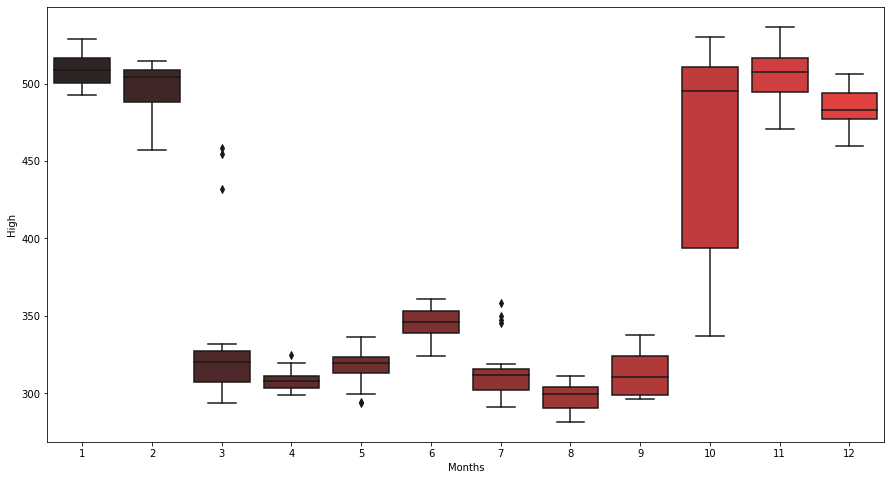

In [81]:
plt.figure(figsize= (15,8))
sns.boxplot(x = tatamotors_1year.Months, y = tatamotors_1year.High, palette= a)

In [45]:
px.box(x = tatamotors_1year.Months, 
    y = tatamotors_1year.High)

In [46]:
px.box(x = tatamotors_1year.Day_name, y = tatamotors_1year.High)

## Histogram for Distribution on values

In [83]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = tatamotors_1year.Open, name='Open', margin))
fig.add_trace(go.Histogram(x = tatamotors_1year.Low, name='Low'))
fig.add_trace(go.Histogram(x = tatamotors_1year.High, name= 'High'))

fig.show()

In [48]:
px.histogram(x = tatamotors_1year.Open)

## Moving average line plot

In [142]:
tatamotors_1year['Moving_avg_2'] = tatamotors_1year.High.rolling(2).mean()
tatamotors_1year['Moving_avg_5'] = tatamotors_1year.High.rolling(5).mean()
tatamotors_1year['Moving_avg_10'] = tatamotors_1year.High.rolling(10).mean()

In [149]:
fig = px.line(data_frame=tatamotors_1year.iloc[:100,:], 
        x = tatamotors_1year.index[:100],
        y = ['High', 'Moving_avg_2', 'Moving_avg_5', 'Moving_avg_10'])
fig.update_layout(hovermode = 'x unified')

# Dataset Manipulation

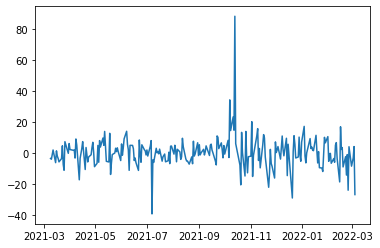

In [124]:
plt.plot(tatamotors_1year.High.diff(1))

In [153]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = tatamotors_1year.index, y = tatamotors_1year['High'].pct_change(1)))
fig.add_trace(go.Line())
fig.show()

# <span><center style="background-color:#922b21;color:white"><strong>Dataset Creation </strong></center></span>

In [49]:
tatamotors_1year.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Years,Months,Days,Day_name
Index,,,,,,,,,,,,
2021-03-08,2021-03-08,331.750000,331.750000,318.799988,321.250000,81925952,0,0,2021,3,8,Monday
2021-03-09,2021-03-09,325.000000,328.350006,309.600006,315.200012,74702208,0,0,2021,3,9,Tuesday
2021-03-10,2021-03-10,319.500000,324.450012,316.700012,321.450012,58643853,0,0,2021,3,10,Wednesday
2021-03-12,2021-03-12,325.049988,326.500000,314.149994,317.549988,48360842,0,0,2021,3,12,Friday
2021-03-15,2021-03-15,320.000000,320.399994,310.049988,318.549988,45081385,0,0,2021,3,15,Monday


In [50]:
tatamotors_1year['Mean']=np.mean(tatamotors_1year.iloc[:,1:5], axis = 1)

In [51]:
tatamotors_2m['Mean'] = np.mean(tatamotors_2m.iloc[:,1:5], axis = 1)

In [52]:
# To create dataset for LSTM
def Time_series_dataset(data_column, time_steps):
    dataset = []
    target = []
    for i in range(data_column.shape[0]-time_steps-1):
        a = data_column[i:time_steps+i].to_list()
        target_value = data_column[time_steps+i]
        target.append(target_value)
        dataset.append(a)
    df = pd.DataFrame(dataset)
    df['Target'] = target
    return df

## Mean Value Dataset

### Day wise dataset

In [53]:
mean_value_dataset = Time_series_dataset(tatamotors_1year.Mean, 50)

In [54]:
mean_value_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Target
0,325.887497,319.537506,320.525009,320.812492,317.249992,319.487503,312.099998,308.587502,303.412506,304.275002,...,313.487495,323.812500,320.275002,317.937500,329.762505,315.625008,311.600006,312.575005,313.150002,315.912498
1,319.537506,320.525009,320.812492,317.249992,319.487503,312.099998,308.587502,303.412506,304.275002,307.162498,...,323.812500,320.275002,317.937500,329.762505,315.625008,311.600006,312.575005,313.150002,315.912498,316.599998
2,320.525009,320.812492,317.249992,319.487503,312.099998,308.587502,303.412506,304.275002,307.162498,299.050003,...,320.275002,317.937500,329.762505,315.625008,311.600006,312.575005,313.150002,315.912498,316.599998,318.912498
3,320.812492,317.249992,319.487503,312.099998,308.587502,303.412506,304.275002,307.162498,299.050003,288.949997,...,317.937500,329.762505,315.625008,311.600006,312.575005,313.150002,315.912498,316.599998,318.912498,320.599998
4,317.249992,319.487503,312.099998,308.587502,303.412506,304.275002,307.162498,299.050003,288.949997,294.699997,...,329.762505,315.625008,311.600006,312.575005,313.150002,315.912498,316.599998,318.912498,320.599998,317.325005


### Minute wise dataset

In [55]:
mean_value_dataset_minute = Time_series_dataset(tatamotors_2m.Mean, 50)

In [56]:
mean_value_dataset_minute.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Target
0,520.812500,521.625000,520.225006,518.375000,518.175003,518.537506,519.024994,520.574982,521.487503,521.412506,...,518.949997,518.712509,518.162506,517.437485,517.475006,517.650009,518.000000,518.350006,518.300003,517.950012
1,521.625000,520.225006,518.375000,518.175003,518.537506,519.024994,520.574982,521.487503,521.412506,521.237518,...,518.712509,518.162506,517.437485,517.475006,517.650009,518.000000,518.350006,518.300003,517.950012,517.799988
2,520.225006,518.375000,518.175003,518.537506,519.024994,520.574982,521.487503,521.412506,521.237518,521.962494,...,518.162506,517.437485,517.475006,517.650009,518.000000,518.350006,518.300003,517.950012,517.799988,517.574997
3,518.375000,518.175003,518.537506,519.024994,520.574982,521.487503,521.412506,521.237518,521.962494,522.712494,...,517.437485,517.475006,517.650009,518.000000,518.350006,518.300003,517.950012,517.799988,517.574997,517.675018
4,518.175003,518.537506,519.024994,520.574982,521.487503,521.412506,521.237518,521.962494,522.712494,522.350006,...,517.475006,517.650009,518.000000,518.350006,518.300003,517.950012,517.799988,517.574997,517.675018,518.087509


## Volume dataset

In [57]:
volume_dataset = Time_series_dataset(tatamotors_1year.Volume, 50)

In [58]:
volume_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Target
0,81925952,74702208,58643853,48360842,45081385,39267404,47262481,73731921,109932681,56385019,...,58472304,111584920,81305325,51162423,86153088,119407026,54043899,40358753,31963997,37382263
1,74702208,58643853,48360842,45081385,39267404,47262481,73731921,109932681,56385019,60240483,...,111584920,81305325,51162423,86153088,119407026,54043899,40358753,31963997,37382263,28639717
2,58643853,48360842,45081385,39267404,47262481,73731921,109932681,56385019,60240483,61523819,...,81305325,51162423,86153088,119407026,54043899,40358753,31963997,37382263,28639717,49484106
3,48360842,45081385,39267404,47262481,73731921,109932681,56385019,60240483,61523819,84528317,...,51162423,86153088,119407026,54043899,40358753,31963997,37382263,28639717,49484106,26618815
4,45081385,39267404,47262481,73731921,109932681,56385019,60240483,61523819,84528317,80924011,...,86153088,119407026,54043899,40358753,31963997,37382263,28639717,49484106,26618815,30917309
